In [39]:
'''
LAB: Glass Identification
'''

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
## PART 1

# read data into a DataFrame
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data',
                 header=None, names=['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type'],
                 index_col='id')
df.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [22]:
# Question 1. Are there any null values? If so, where?
df.isnull().values.sum()
df.isnull().values.any()
# df.describe()

False

In [23]:
# Question 2. Is this problem classification or regression?
# This problem is a regression

In [24]:
# Question 3: Create a new column called "glass_type_binary"
# convert to binary classification problem:
#   types 1/2/3/4 are mapped to 0 in glass_type_binary
#   types 5/6/7 are mapped to 1 in glass_type_binary

In [28]:
glass_type_binary = np.where(df.glass_type >= 5, 1, 0) 
df['glass_type_binary'] = glass_type_binary
df.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,glass_type_binary
id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


In [29]:
## PART 2 Setting it all up

# create a list of feature names
feature_cols = ['ri','na','mg','al','si','k','ca','ba','fe']


# define X (features) and y (response)
X = df[feature_cols]        # features
y = df.glass_type_binary    # binary response
y2 = df.glass_type          # multinomial response

In [30]:
# the null accuracy rate is an accuracy rate in which you always predict the majority class in
# a prediction problem. 
# accuracy rate if you only guessed the most common thing. 
# if binary - guess the most common binary response. guess mode. 
# must be better than the best guess
from sklearn.metrics import accuracy_score

# Question 4: What is the null accuracy rate for the binomial and the multinomial problem?

# null acuracy rate for binomial promblem
y_true = df.glass_type_binary
bg = df.glass_type_binary.mode()
y_true = df.glass_type_binary
bg = int(df.glass_type_binary.mode())
y_pred = np.ones(len(df.glass_type_binary)) * bg
print accuracy_score(y_true, y_pred)

# null acuracy rate for multinomial promblem
y_true = df.glass_type
bg = df.glass_type.mode()
y_true = df.glass_type
bg = int(df.glass_type.mode())
y_pred = np.ones(len(df.glass_type)) * bg
print accuracy_score(y_true, y_pred)


0.761682242991
0.355140186916


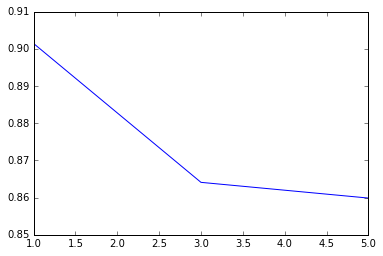

In [41]:
## PART 3
# fit a KNN model and make predictions with the binary response. 
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score

# Question 5: Fit a KNN model with 1 3, and 5 neighbors
# Be sure to use cross validation to get an accurate prediction of out of sample error

scores = []
# testing k values 1,3,5
ks = [1,3,5] 
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    scorek = np.mean(cross_val_score(knn, X, y, cv=5, scoring='accuracy'))
    scores = np.append(scores,scorek)

scores

plt.figure()
plt.plot(ks, scores)



0.873831775701
{'n_neighbors': 2}


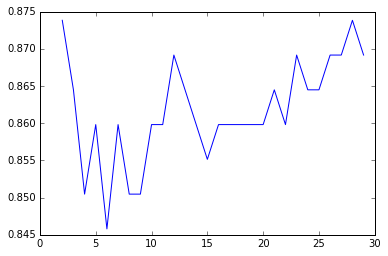

In [56]:
# Question 6: Use grid search to find the optimal value of K and the best accuracy rate

knn = KNeighborsClassifier()
# k_range = range(1, 30, 1) # with k =1 over fitting?
k_range = range(2, 30, 1)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_] # get scores from grid.grid_scores_

# visualize results
plt.figure()
plt.plot(k_range, grid_mean_scores)

print grid.best_score_
print grid.best_params_

# Question 7: did your best score beat the null accuracy rate for the binary response?
# Null binary accuracy rate = 0.761682242991
# Best K = 2 0.873831775701. 
# Yes, beat the null accuracy rate fro binary response


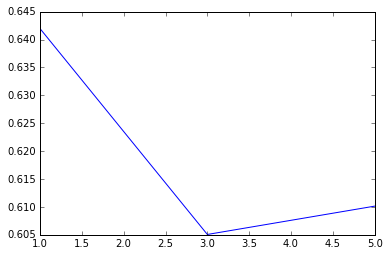

In [57]:
## PART 4
# fit a KNN model and make predictions with the multinomial response. 

# Question 8: Fit a KNN model with 1 3, and 5 neighbors
# Be sure to use cross validation to get an accurate prediction of out of sample error
scores = []

# testing k values 1,3,5
ks = [1,3,5] 
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    scorek = np.mean(cross_val_score(knn, X, y2, cv=5, scoring='accuracy'))
    scores = np.append(scores,scorek)

scores

plt.figure()
plt.plot(ks, scores)


0.626168224299
{'n_neighbors': 17}


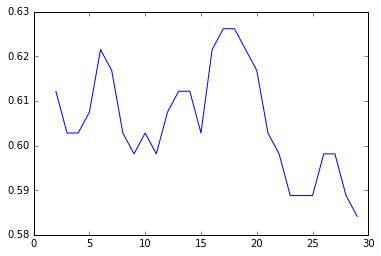

In [59]:
# Question 9: Use grid search to find the optimal value of K and the best accuracy rate

knn = KNeighborsClassifier()
# k_range = range(1, 30, 1) # with k =1 over fitting?
k_range = range(2, 30, 1)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y2)

grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_] # get scores from grid.grid_scores_

# visualize results
plt.figure()
plt.plot(k_range, grid_mean_scores)

print grid.best_score_
print grid.best_params_
# Question 10: did your best score beat the null accuracy rate for the multinomial response?
# null accracy for multimomial response 0.355140186916
# k = 17 0.626168224299
# Yes, beat the null accurcy rate

In [66]:
## PART 5 Fine tuning our data

# As we learned previously, KNN is sensitive to irrelevant and non-scaled columns
# Let's use sklearn to clean it up
from sklearn import preprocessing

# scale all data to a zero mean  and unit variance (std = 1)
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = feature_cols
X_scaled.head()

# Question 11: Try all of the previous steps to grid search the optimal KNN model. 
# But this time used the scaled X values instead.
# Do you better accuracy with scaled data?

,ri,na,mg,al,si,k,ca,ba,fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


Binomial Response
0.883177570093
{'n_neighbors': 27}
Multinmial Response
0.672897196262
{'n_neighbors': 2}


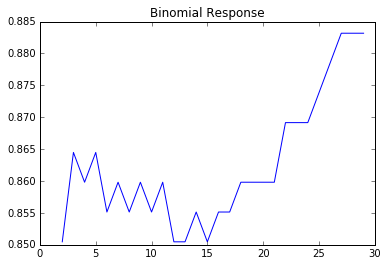

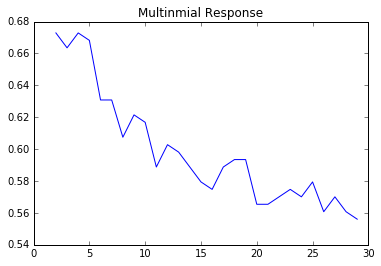

In [69]:
# Question 11: Try all of the previous steps to grid search the optimal KNN model. 
# But this time used the scaled X values instead.
# Do you better accuracy with scaled data?

X = X_scaled[feature_cols]        # scaled features

# -----  binomial response
print 'Binomial Response'
knn = KNeighborsClassifier()
# k_range = range(1, 30, 1) # with k =1 over fitting?
k_range = range(2, 30, 1)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_] # get scores from grid.grid_scores_

# visualize results
plt.figure()
plt.plot(k_range, grid_mean_scores)
plt.title('Binomial Response')

print grid.best_score_
print grid.best_params_
# Null binary accuracy rate = 0.761682242991
#  Best  with non scaled K = 2;  0.873831775701. 
#  Binomial Response with scaled K = 27;  0.883177570093

# ---- multinomial response
print 'Multinmial Response'
knn = KNeighborsClassifier()
# k_range = range(1, 30, 1) # with k =1 over fitting?
k_range = range(2, 30, 1)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y2)

grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_] # get scores from grid.grid_scores_

# visualize results
plt.figure()
plt.plot(k_range, grid_mean_scores)
plt.title('Multinmial Response')

print grid.best_score_
print grid.best_params_

# null accracy for multimomial response 0.355140186916
# Best  with non scaled  k = 17; 0.626168224299
# Multinomial Response with scaled k = 2;  0.672897196262

In [ ]:
# Try playing around with different features (removing some) and seeing if this helps improve overall
# predictive power.
# Hint, try making a method that takes in feature columns and runs the entire process in order to compre
# faster
